In [1]:
import numpy as np, local, plottools as pl, cmb, emcee, corner, camb
from matplotlib.pyplot import *
cr = rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
f = open('data/SPTpol_cosmomc/data/sptpol_500d_bb/sptpol_500d_BB_beamerror.bin', 'r')
neff, n_beam_terms = np.fromfile(f,dtype=np.int32,count=2)
berr = np.reshape(np.fromfile(f,dtype=np.float64),(neff,n_beam_terms))
f.close()

In [4]:
# bandpower window function
l, window = local.read_bp_window()

In [9]:
# theory EE power spectrum
EE = local.prep_camb(int(max(l)),sptpol=False)[0]

In [10]:
# bandpower (each freq)
bc, bb_data = local.read_bp_freq()
# bandpower (combined)
bb_m = np.array([0.004,0.030,0.094,0.118,0.097,0.119,0.064])
bb_v = np.array([0.014,0.010,0.010,0.016,0.026,0.042,0.060])

In [11]:
# BB theory
BB, bb = local.prep_bb_theory(l,window)

In [12]:
# bandpower covariance matrix
cov = local.read_bp_cov()

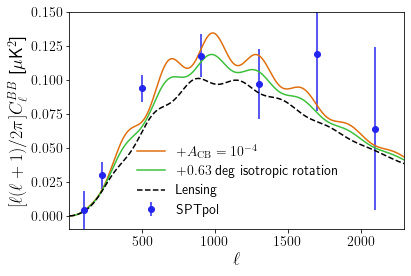

In [21]:
fac = cmb.Tcmb**2*l*(l+1)/(2*np.pi)
pl.plot_1dstyle(usetex=True,xlab=r'$\ell$',ylab=r'$[\ell(\ell+1)/2\pi]C^{BB}_{\ell}$ [$\mu$K$^2$]',xmin=2,xmax=2300,ymin=-0.01,ymax=.15)
errorbar(bc,bb_m,fmt='o',yerr=bb_v,label='SPTpol')
plot(l,BB['lens']+BB['arot']*1e-4,label=r'$+A_{\rm CB}=10^{-4}$',ls='-')
plot(l,BB['lens']+fac*4*(0.63*np.pi/180.)**2*EE[int(min(l))+1:],label=r'$+0.63$ deg isotropic rotation',ls='-')
plot(l,BB['lens'],label='Lensing',color='k',ls='--')
legend()
savefig('fig_const_aps.pdf',bbox_inches='tight',pad_inches=0)

In [13]:
ndim, samples0 = local.run_mcmc(bb,bb_data,cov,berr,n=3,arot=True,nwalkers=500,sAlens=0.1,mAdust=0.0094,steps=10000,discard=100,thin=20)
__, samples1 = local.run_mcmc(bb,bb_data,cov,berr,n=3,arot=True,nwalkers=500,sAlens=0.025,mAdust=0.0094,steps=10000,discard=100,thin=20)

  0%|          | 0/10000 [00:00<?, ?it/s]/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [06:39<00:00, 25.02it/s]


1.1253854879397736 [-0.66995756  0.52704003] [-1.09716882  1.06306925]


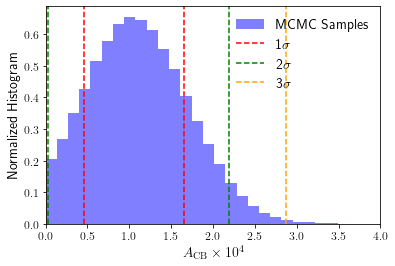

1.0340523520349143 [-0.53703772  0.47296637] [-0.97310298  0.90903164]


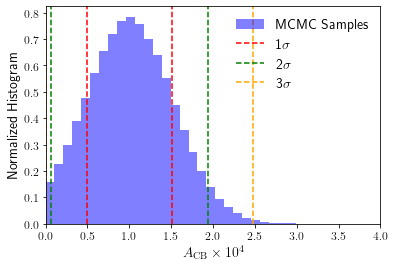

<Figure size 432x288 with 0 Axes>

In [14]:
params = {
    'axes.labelsize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
}
rcParams.update(params)
for i, samples in enumerate([samples0,samples1]):

    mean, sigma_1, sigma_2, sigma_3, samples_Acb = local.compute_hpd(samples[:,0]*1e4)

    hist(samples_Acb, bins=30, density=True, alpha=0.5, color='blue', label='MCMC Samples')
    xlabel(r'$A_{\rm CB}\times 10^4$')
    xlim(0.,4.)
    ylabel('Normalized Histogram')
    #title('1D Marginalized Histogram')
    axvline(sigma_1[0], color="red", ls="--", label=r"1$\sigma$")
    axvline(sigma_1[1], color="red", ls="--")
    axvline(sigma_2[0], color="green", ls="--", label=r"2$\sigma$")
    axvline(sigma_2[1], color="green", ls="--")
    axvline(sigma_3[0], color="orange", ls="--", label=r"3$\sigma$")
    axvline(sigma_3[1], color="orange", ls="--")
    legend()
    savefig('fig_const_'+str(i)+'.pdf',bbox_inches='tight',pad_inches=0)
    show()
    clf()